<a href="https://colab.research.google.com/github/Shantanu-sg-01/xfoil_data/blob/main/Copy_of_Group_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GW01 

203016003 

203010010

203010027

203014001

160010038

In [ ]:
import numpy as np
from matplotlib import pyplot
%matplotlib inline
import pandas as pd

Question 1

In [ ]:
class Camber_distribution():
    
    def __init__(self,name='1312'):
        self.name=name
        self.m=int(name[0])/100
        self.p=int(name[1])/10
        #self.tm=int(name[2:4])/100
    
    def zc(self,x):
        m=self.m
        p=self.p
        if x <= p:
            z= (m/p**2)*(2*p*x-x**2)
        elif x>p:
            z= (m/(1-p)**2) *(1-2*p+2*p*x-x**2)
        return(z) 

Question 2

In [ ]:
class Thickness_distribution():
    
    def __init__(self,name='1312'):
        self.name=name
        #self.m=int(name[0])/100
        #self.p=int(name[1])/10
        self.tm=int(name[2:4])/100
    
    t=lambda self, x:5*self.tm*(0.2969*np.sqrt(x)- 0.1260*x -0.3516*x**2
                  +0.2843*x**3 -0.1036*x**4)

In [ ]:
!git clone https://github.com/Shantanu-sg-01/xfoil_data.git

fatal: destination path 'xfoil_data' already exists and is not an empty directory.


In [ ]:

cp_data = pd.read_excel('xfoil_data/Copy of Cp_at_8_degree_aplha.xlsx')

x = pd.DataFrame(cp_data['x'])
y = pd.DataFrame(cp_data['y'])

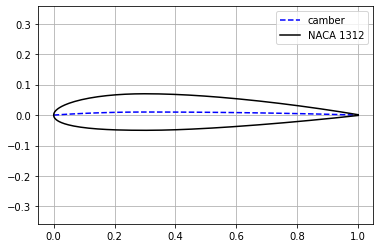

In [ ]:
X=np.linspace(0,1,51)
Zc=np.array([Camber_distribution().zc(x) for x in X])

pyplot.plot(X, Zc,"--b", label='camber')
pyplot.plot(x, y, '-k',label='NACA 1312')
pyplot.legend()
pyplot.axis('equal')
pyplot.ylim(-0.1,0.1)
pyplot.grid()

Question 3 & 4

In [ ]:
class Num_deriv:

    N=100
    X=np.linspace(0,1,N+1)
    Zt=np.array([Thickness_distribution().t(x) for x in X])
    
        
    def dZt(self,X=X,Zt=Zt):
    
        n=np.size(X)       
        Zc=Zt                  
                   
        dFn=np.zeros(np.size(X))
        for i in range(n):
            if X[i]==0:
                dfn=(Zc[i+1]-Zc[i])/(X[i+1]-X[i])
            elif X[i]>0 and X[i]<1:
                  dfn=(Zc[i+1]-Zc[i-1])/((X[i+1]-X[i-1]))
            elif X[i]==1:
                  dfn=(Zc[i]-Zc[i-1])/(X[i]-X[i-1])
            dFn[i]=dfn
            
        return(dFn)
    

Question 5

In [ ]:
def trapz(Array_1,F):
    if np.size(F)<=1:
        return 0
    else:
        N=np.size(Array_1)-1
        a,b=Array_1[0],Array_1[-1]
        h=(b-a)/N
        A=(h/2)*(F[0]+F[-1]+2*sum(F[1:-1]))
        return(A)

In [ ]:
class Thin_airfoil:
    N=100
    X=np.linspace(0,1,N+1)
    theta=np.array([np.arccos(1-2*x) for x in X])
    Zc=[Camber_distribution().zc(x) for x in X]
    Zt=np.array([Thickness_distribution().t(x) for x in X]) 
    dZc=Num_deriv().dZt(X,Zc)
    dZt=Num_deriv().dZt(X,Zt)
    
    def __init__(self, alpha ,dZc=dZc,dZt=dZt):
        self.alpha=alpha
        self.dZc=dZc
        self.dZt=dZt
        

    dZc_Cos_fn= lambda self, n: self.dZc*np.cos(n*self.theta)
    A0= lambda self: -trapz(self.theta[1:-1],self.dZc[1:-1])/np.pi      #excluding first last data points
    An=lambda self,n:(2/np.pi)*trapz(self.theta,self.dZc_Cos_fn(n))     # valid for n>=1 
    An_Sin_fn=lambda self,n,t: self.An(n)*np.sin(n*t)
    
    Cl = lambda self: 2*np.pi*(self.alpha+self.A0()+(self.An(1)/2))
    Cm_LE = lambda self: -(np.pi/2)*(alpha+self.A0()+self.An(1)-(self.An(2)/2))
    Cm_c4= lambda self:(np.pi/4)*(self.An(2)- self.An(1)) 
    

    
    def Cp_t(self,X=X,dZt=dZt):
        Cp=np.ones(np.size(X))      # initialized
        j=1
        for k in range(np.size(X)-1):
            x1=X[j]
            f1=dZt[1:j]/(x1-X[1:j])
            A1=trapz(X[1:j],f1)
            f2=dZt[j+1:-1]/(x1-X[j+1:-1])
            A2=trapz(X[j+1:],f2)
         
            Cp[j]=(A1+A2)*(-2/np.pi)
   
            j+=1
        return(Cp)
    
    def Cp_camber_AoA(self):
        theta=self.theta
        n=np.size(theta)
        alpha=self.alpha
        A0=self.A0
        An=self.An
        Cp_c=np.ones(n)
        for i in range(n-1):
            t= theta[i+1]
           
            term1=alpha+(A0()*((1+np.cos(t))/np.sin(t)))
                     
            term2= sum([ self.An_Sin_fn(n,t) for n in np.linspace(1,20,20)])
            
            Cp_c[i+1]=(term1+term2)*(-2)
            
        return(Cp_c)
    '''
    if plot_results==True:
       #cpt = self.Cp_t()
       cp_camber = lambda self: self.Cp_camber_AoA() + self.Cp_t()
       pyplot.plot(X, cp_camber())
       pyplot.plot(X, -cp_camber())
       '''
    

Text(0, 0.5, 'Pressure Coefficient')

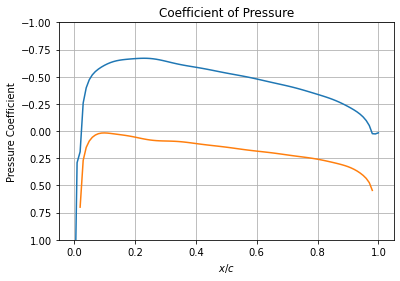

In [ ]:

N=100
X=np.linspace(0,1,N+1)
a = Thin_airfoil(8*np.pi/180)
cp_camber_upper =  a.Cp_camber_AoA() + a.Cp_t()
cp_camber_lower =  -a.Cp_camber_AoA() + a.Cp_t()
pyplot.plot(X, cp_camber_upper)
pyplot.plot(X[2:-2], cp_camber_lower[2:-2])
pyplot.ylim(1,-1)
pyplot.grid()
pyplot.title('Coefficient of Pressure')
pyplot.xlabel('$x/c$')
pyplot.ylabel('Pressure Coefficient')

Question 6

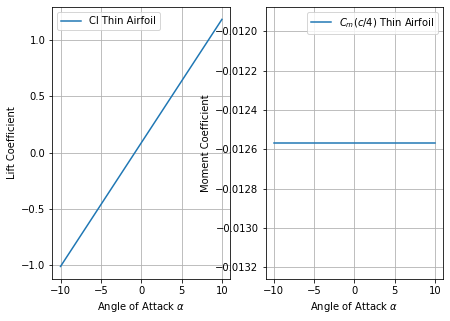

In [ ]:
N=100
X=np.linspace(0,1,N+1)
Zc=[Camber_distribution().zc(x) for x in X]
Zt=np.array([Thickness_distribution().t(x) for x in X]) 
dZc=Num_deriv().dZt(X,Zc)
dZt=Num_deriv().dZt(X,Zt)


alpha=np.linspace(-10, 10,101)
alpha_rad = alpha*np.pi/180
Cl = np.array([Thin_airfoil(a, dZc, dZt).Cl() for a in alpha_rad])
cm_c_by_4 = np.array([Thin_airfoil(a, dZc, dZt).Cm_c4() for a in alpha_rad])

fig, ax = pyplot.subplots(nrows=1, ncols=2, figsize=(7, 5))
ax[0].plot(alpha, Cl, label='Cl Thin Airfoil')
ax[0].set_xlabel(r'Angle of Attack $\alpha$')
ax[0].set_ylabel('Lift Coefficient')
ax[0].legend()
ax[0].grid()

ax[1].plot(alpha, cm_c_by_4, label='$C_m(c/4)$ Thin Airfoil')
ax[1].set_xlabel(r'Angle of Attack $\alpha$')
ax[1].set_ylabel('Moment Coefficient')
ax[1].legend()
ax[1].grid()

Question 7

In [ ]:
!git clone https://github.com/Shantanu-sg-01/xfoil_data.git

Cloning into 'xfoil_data'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


In [ ]:

cp_data = pd.read_excel('xfoil_data/Copy of Cp_at_8_degree_aplha.xlsx')
cl_xfoil = pd.read_excel('xfoil_data/Re_5mil_naca1312.xlsx')
x = pd.DataFrame(cp_data['x'])
y = pd.DataFrame(cp_data['y'])

aoa = pd.DataFrame(cl_xfoil['alpha'])
cl = pd.DataFrame(cl_xfoil['CL'])
cd = pd.DataFrame(cl_xfoil['CDp'])
cm = pd.DataFrame(cl_xfoil['CM'])

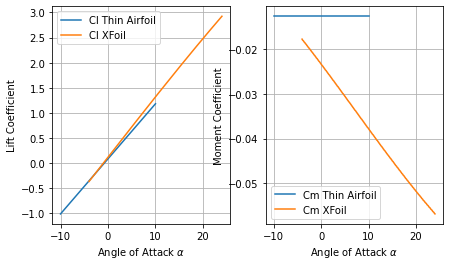

In [ ]:
fig, ax = pyplot.subplots(nrows=1, ncols=2, figsize=(7, 4))
ax[0].plot(alpha, Cl, label='Cl Thin Airfoil')
ax[0].plot(aoa, cl, label='Cl XFoil')
ax[0].set_xlabel(r'Angle of Attack $\alpha$')
ax[0].set_ylabel('Lift Coefficient')
ax[0].legend()
ax[0].grid()

ax[1].plot(alpha, cm_c_by_4, label='Cm Thin Airfoil')
ax[1].plot(aoa, cm, label='Cm XFoil')
ax[1].set_xlabel(r'Angle of Attack $\alpha$')
ax[1].set_ylabel('Moment Coefficient')
ax[1].legend()
ax[1].grid()

In [ ]:
aoa_solution = Thin_airfoil(0*np.pi/180.)
cp_t = aoa_solution.Cp_t()
cp_camber = aoa_solution.Cp_camber_AoA()
X=np.linspace(0,1,101)

Cp plots

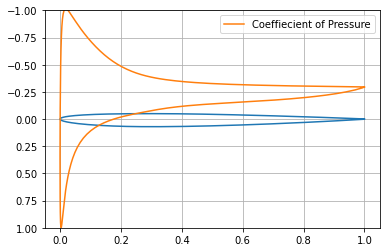

In [ ]:
cp_data = pd.read_excel('xfoil_data/Copy of Cp_at_8_degree_aplha.xlsx')
x = pd.DataFrame(cp_data['x'])
y = pd.DataFrame(cp_data['y'])
cp = pd.DataFrame(cp_data['Cp'])


pyplot.plot(x, y)
pyplot.plot(x, cp, label='Coeffiecient of Pressure')
pyplot.grid()
pyplot.ylim(1,-1)
pyplot.legend()


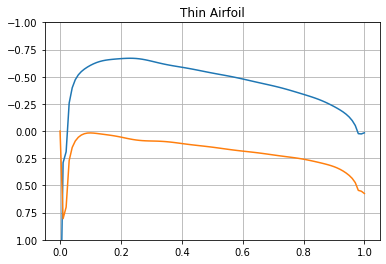

In [ ]:
X=np.linspace(0,1,101)
a = Thin_airfoil(8*np.pi/180)
cp_camber =  a.Cp_camber_AoA() + a.Cp_t()
pyplot.plot(X, cp_camber_upper)
pyplot.plot(X, cp_camber_lower)
pyplot.ylim(1,-1)
#pyplot.xlim(0, 1)
#pyplot.plot(x, y)
pyplot.title('Thin Airfoil')
pyplot.grid()



##NACA 1312

Lift slope = 0.11 per degree (Thin Airfoil Theory)

Lift Slope = 0.12 per degree (Xfoil)

$\alpha$ ($C_L$ = 0) = $-1^0$ degree  (Thin Airfoil Theory)

$\alpha$ ($C_L$ = 0) = $-0.98^0$ degree  (XFoil)


